In [24]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 10)

In [25]:
#First step is to read the data and label the column names. 
heart_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data",col_name = FALSE)
colnames(heart_data) <- c("age", "sex", "chest_pain", "resting_bp", "cholesterol", "fbs>120mg/dL", "restingecg", "max_heart_rate", "exercise_induced_angina", "oldpeak", "slope", "ca", "thal", "disease")

heart_data
                       

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain,resting_bp,cholesterol,fbs>120mg/dL,restingecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,ca,thal,disease
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
56,1,4,155,342,1,0,150,1,3.0,2,?,?,1


In [26]:
#Here we are tidying the data by filtering out columns with "?" and selecting which columns we want. 
heart_data_tidy <- heart_data |> select(chest_pain, resting_bp, cholesterol, restingecg, max_heart_rate, disease) |>
                   filter(chest_pain!= "?", resting_bp!= "?", cholesterol!= "?", restingecg!= "?", max_heart_rate!= "?", disease!= "?") |>
                   mutate(chest_pain = as_factor(chest_pain), 
                          resting_bp = as.numeric(resting_bp),
                          cholesterol = as.numeric(cholesterol),
                          restingecg = as_factor(restingecg),
                          max_heart_rate = as.numeric(max_heart_rate),
                          disease = as_factor(disease))

#levels(heart_data_tidy$chest_pain) <- c("typical angina", "atypical angina", "non-anginal", "asymptomatic")
#levels(heart_data_tidy$restingecg) <- c("normal", "ST-T wave abnormality", "left ventricular hypertrophy")
#levels(heart_data_tidy$disease) <- c("No", "Yes")


heart_data_tidy
#  heart_data_miss_data_num <- heart_data_tidy|>
#                         map_df(is.na)|>
#                         map_df(sum)
# heart_data_miss_data_num

# heart_data_obs_num <- heart_data_tidy|>
#      summarize(n_chest_pain = sum(!is.na(chest_pain)),
#                n_resting_bp = sum(!is.na(resting_bp)),
#                n_cholesterol = sum(!is.na(cholesterol)),
#                n_restingecg = sum(!is.na(restingecg)),
#                n_max_heart_rate = sum(!is.na(max_heart_rate)),
#                n_disease = sum(!is.na(disease)))
# heart_data_obs_num

# heart_data_max_heart_rate_mean <- heart_data_tidy|>
#                                   summarize(mean.mhr=mean(max_heart_rate, na.rm=TRUE))
# heart_data_max_heart_rate_mean

chest_pain,resting_bp,cholesterol,restingecg,max_heart_rate,disease
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
2,130,132,2,185,0
2,120,243,0,160,0
1,170,237,1,170,0
2,100,219,1,150,0
2,105,198,0,165,0
⋮,⋮,⋮,⋮,⋮,⋮
4,160,331,0,94,1
3,130,294,1,100,1
4,155,342,0,150,1


In [33]:
heart_split <- initial_split(heart_data_tidy, prop = .75, strata = disease)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)
heart_train


chest_pain,resting_bp,cholesterol,restingecg,max_heart_rate,disease
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
2,130,132,2,185,0
2,120,243,0,160,0
1,170,237,1,170,0
2,100,219,1,150,0
2,105,198,0,165,0
⋮,⋮,⋮,⋮,⋮,⋮
4,160,331,0,94,1
3,130,294,1,100,1
4,155,342,0,150,1


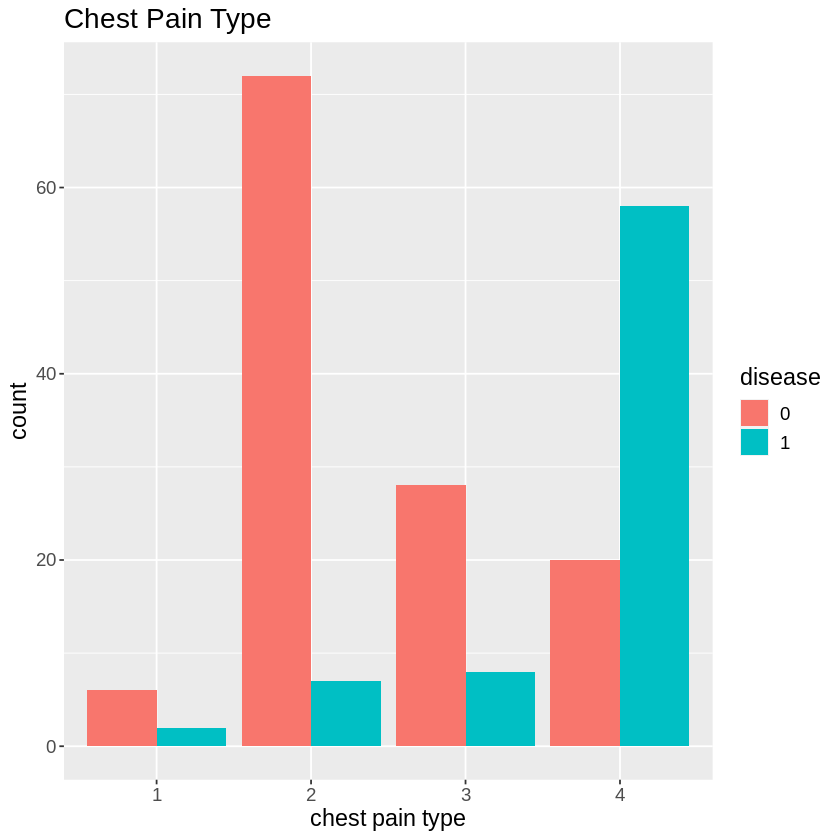

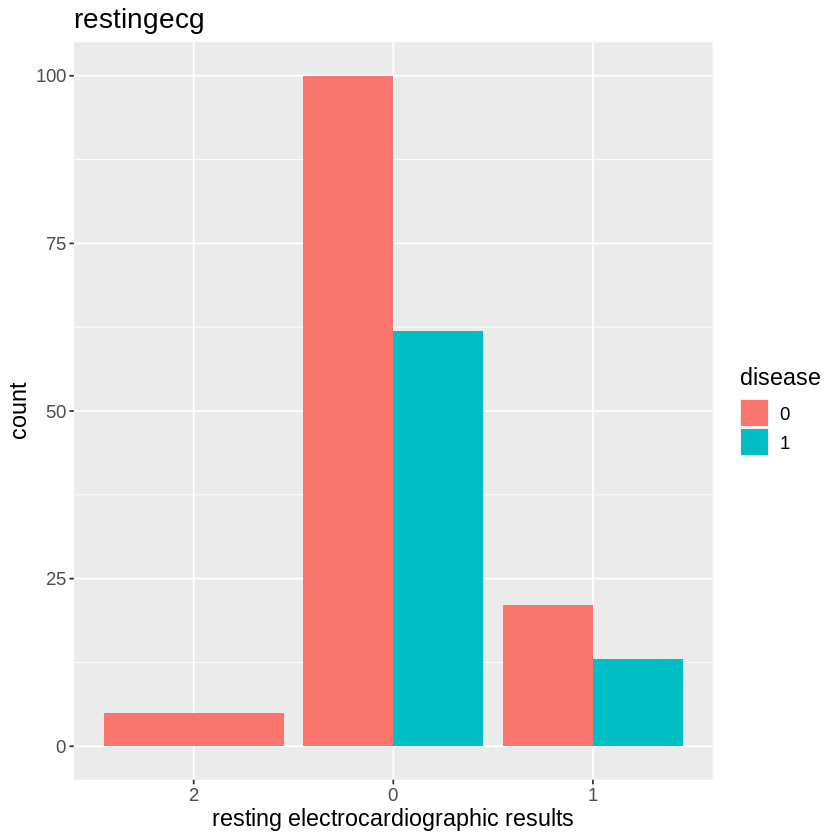

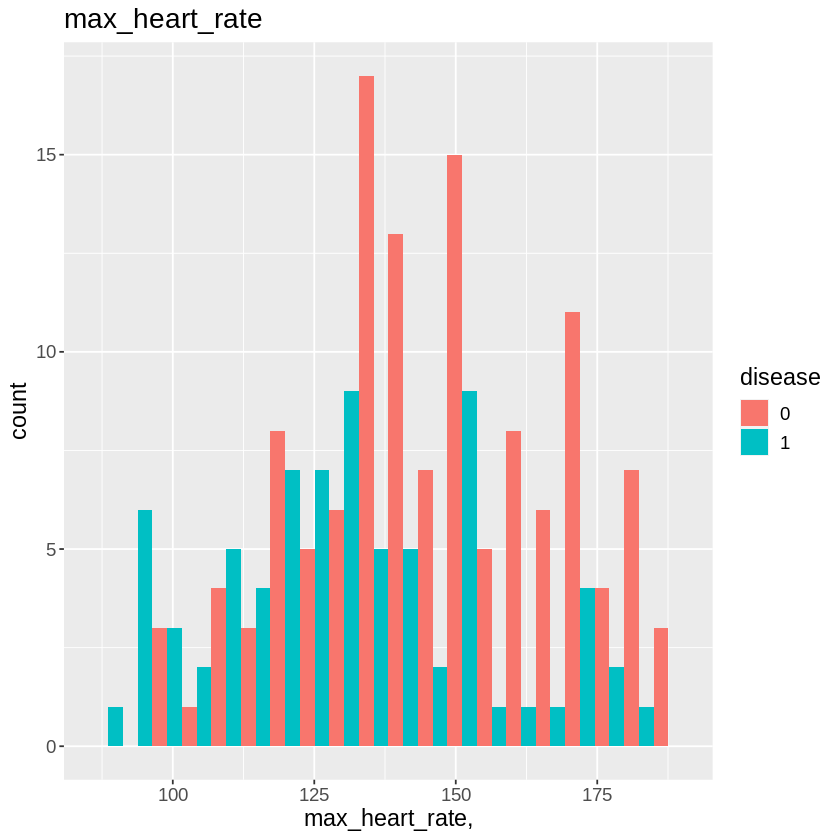

In [32]:
chest_pain_plot <- ggplot(heart_train , 
                   aes(x = chest_pain, fill = disease)) +
                   geom_bar(position= "dodge") +
                   labs(x = "chest pain type", y = "count",  fill = "disease") +
                   ggtitle("Chest Pain Type") +
                   theme(text = element_text(size = 14))
chest_pain_plot
restingecg_plot <- ggplot(heart_train , 
                   aes(x = restingecg, fill = disease)) +
                   geom_bar(position= "dodge") +
                   labs(x = "resting electrocardiographic results", y = "count",  fill = "disease") +
                   ggtitle("restingecg") +
                   theme(text = element_text(size = 14))
restingecg_plot
max_heart_rate_plot <- ggplot(heart_train , 
                   aes(x = max_heart_rate, fill = disease)) +
                   geom_histogram(position= "dodge", bins=20) +
                   labs(x = "max_heart_rate,", y = "count",  fill = "disease") +
                   ggtitle("max_heart_rate") +
                   theme(text = element_text(size = 14))
max_heart_rate_plot